In [1]:
import matplotlib

import matplotlib.font_manager as fm

font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

font_name = fm.FontProperties(fname = font_location).get_name()

matplotlib.rc('font',family = font_name)

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

In [3]:
# 데이터 불러오기
df_raw=pd.read_csv("유방암.csv", engine="python")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# 목표변수, 설명변수 데이터 지정
df_raw_y=df_raw["diagnosis"]
df_raw_x=df_raw.drop("diagnosis", axis=1, inplace=False)

#train_test_split(x: 설명변수 데이터, y: 목표변수 데이터, test_size=test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (398, 30)
train data Y size : (398,)
test data X size : (171, 30)
test data Y size : (171,)


In [5]:
# train은 0.4, train의 validation은 0.3이 되도록 train_data를 다시 분할
df_train_x, df_val_x, df_train_y, df_val_y=train_test_split(df_train_x, df_train_y, test_size=3/7)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("validation data X size : {}".format(df_val_x.shape))
print("validation data Y size : {}".format(df_val_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
validation data X size : (171, 30)
validation data Y size : (171,)


In [44]:
# 기본 옵션으로 모델 생성
svm_uncustomized=SVC(random_state=1234)
svm_uncustomized.fit(df_train_x, df_train_y)

# train set 정확도
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))

# validation set 정확도
print("Accuracy on validation set: {:.3f}".format(svm_uncustomized.score(df_val_x, df_val_y)))

# test accuracy
print("Accuracy on test set:{:.3f}".format(svm_uncustomized.score(df_test_x, df_val_y)))

Accuracy on training set: 1.000
Accuracy on validation set: 0.614
Accuracy on test set:0.614


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [42]:
svm_uncustomized

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1234,
    shrinking=True, tol=0.001, verbose=False)

In [16]:
# svc 모델 파라미터 변경
# c 규제에 대한 강도 변경
# train 및 test 정확도 결과 저장용
train_accuracy=[]
validation_accuracy=[]

# c: 규제(0.01, 0.1, 1, 10)
para_c=[10**c for c in range(-19, 2)]

for v_C in para_c:
    svm=SVC(C=v_C, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    validation_accuracy.append(svm.score(df_val_x, df_val_y))
    
# 데이터 테이블로 저장
df_accuracy_c=pd.DataFrame()
df_accuracy_c["C"]=para_c
df_accuracy_c["TrainAccuracy"]=train_accuracy
df_accuracy_c["ValidationAccuracy"]=validation_accuracy

# C별 정확도 테이블
df_accuracy_c.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

,C,TrainAccuracy,ValidationAccuracy
0,0.000,0.648,0.614
1,0.000,0.648,0.614
2,0.000,0.648,0.614
3,0.000,0.648,0.614
4,0.000,0.648,0.614
5,0.000,0.648,0.614
6,0.000,0.648,0.614
7,0.000,0.648,0.614
8,0.000,0.648,0.614
9,0.000,0.648,0.614


#### C가 1 이상이면 train 데이터 이용한 모델의 정확도는 1이므로 cost는 0.1로 지정한다.

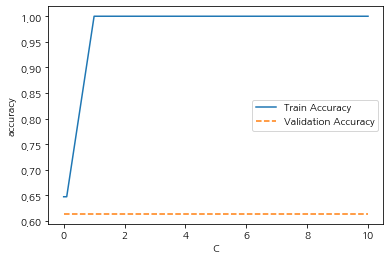

In [17]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_c, validation_accuracy, linestyle="--", label="Validation Accuracy")
plt.ylabel("accuracy")
plt.xlabel("C")
plt.legend()

In [21]:
# svc 모델 파라미터 변경
# gamma 훈련 샘플이 미치는 영향의 범위를 변경
# gamma 훈련 샘플이 미치는 영향의 범위를 변경
# train 및  test 정확도 결과 저장용
train_accuracy=[]
validation_accuracy=[]

# gamma 규제(0.01, 0.1, 1, 10)
para_gamma=[10**gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma, C=0.1, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    validation_accuracy.append(svm.score(df_val_x, df_val_y))
    
# 데이터 테이블로 저장
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["TrainAccuracy"]=train_accuracy
df_accuracy_gamma["ValidationAccuracy"]=validation_accuracy

# gamma별 정확도 테이블
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,ValidationAccuracy
0,0.01,0.6476,0.614
1,0.10,0.6476,0.614
2,1.00,0.6476,0.614
3,10.00,0.6476,0.614


#### gamma의 변화는 정확도에 영향을 미치지 않는다.

In [22]:
# scale 변환
# standardscaler 설명변수 값의 구간을 동일하게 변경

# 변수명 저장
v_feature_name=df_train_x.columns

# StandardScaler 적용
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [23]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x=train_test_split(df_scaled, test_size=0.3, random_state=1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (398, 30)
test data X size : (171, 30)


In [25]:
# train은 0.4, train의 validation은 0.3이 되도록 train_data를 다시 분할
df_scaled_train_x, df_scaled_val_x=train_test_split(df_scaled_train_x, test_size=3/7)

print("train data X size : {}".format(df_scaled_train_x.shape))

print("validation data X size : {}".format(df_scaled_val_x.shape))


train data X size : (227, 30)
validation data X size : (171, 30)


In [34]:
# scale 조절 후 SVC 모델 재실행
# scale이 조정된 데이터로 새로운 모델 생성
svm_scaled=SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)

# Train set 정확도
print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))

# Validation set 정확도
print("Accuracy on validation set: {:.3f}".format(svm_scaled.score(df_scaled_val_x, df_test_y)))

Accuracy on training set: 0.687
Accuracy on validation set: 0.614


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### 기존의 서포트 벡터 머신 모델의 validation accuracy는 61.4%
#### scale이 조정된 서포트 벡터 머신 모델의 validation accuracy도  61.4%

In [37]:
# 새로운 svc 모델 파라미터 변경
# c: 규제에 대한 강도 변경

# train 및 test 정확도 결과 저장용
train_accuracy=[]
validation_accuracy=[]

# c 규제
para_c=[10**c for c in range(-2, 5)]

for v_C in para_c:
    svm=SVC(C=v_C, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    validation_accuracy.append(svm.score(df_scaled_val_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_c=pd.DataFrame()
df_accuracy_c["C"]=para_c
df_accuracy_c["TrainAccuracy"]=train_accuracy
df_accuracy_c["ValidationAccuracy"]=validation_accuracy

# c 별 정확도 테이블
df_accuracy_c.round(3)


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

,C,TrainAccuracy,ValidationAccuracy
0,0.01,0.648,0.614
1,0.10,0.648,0.614
2,1.00,0.687,0.614
3,10.00,0.894,0.556
4,100.00,1.000,0.485
5,1000.00,1.000,0.474
6,10000.00,1.000,0.474


#### C가 1일 때 Validation accuracy가 가장 높고, 모델로 test data에 over fitting 되지 않는다.
#### C=1로 선택

In [33]:
# 새로운 SVC 모델 PARAMETER 변경
# 감마: 훈련 샘플이 미치는 영향의 범위를 변경 결과

# TRAIN 및 TEST 정확도 결과 저장용
train_accuracy=[]
validation_accuracy=[]

# gamma 규제
para_gamma=[10**gamma for gamma in range(-5, 2)]

for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma, C=1, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    validation_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["TrainAccuracy"]=train_accuracy
df_accuracy_gamma["ValidationAccuracy"]=validation_accuracy

# GAMMA 별 정확도 테이블
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,ValidationAccuracy
0,0.000,0.648,0.614
1,0.000,0.648,0.614
2,0.001,0.648,0.614
3,0.010,0.648,0.614
4,0.100,0.806,0.567
5,1.000,1.000,0.614
6,10.000,1.000,0.614


#### GAMMA=0.010일 때 TRAIN DATA에 모델이 OVER-FITTING되지 않고 VALIDATION ACCURACY가 가장 높음
#### GAMMA=0.01 선택

In [41]:
# 결론 도출
# 최종 모델 선택
svm_final=SVC(gamma=0.01, C=1, random_state=1234)
svm_final.fit(df_scaled_train_x, df_train_y)

# 평가
y_pred=svc_final.predict(df_scaled_test_x)

# train set 정확도
print("Accuracy on training set: {:.3f}".format(svm_final.score(df_scaled_train_x, df_train_y)))

# test set 정확도
print("Accuracy on test set: {:.3f}".format(svm_final.score(df_scaled_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# precision 
print("Precision: {:.3f}".format(105/(105+66)))

Accuracy on training set: 0.648
Accuracy on test set: 0.614
Confusion matrix: 
[[105   0]
 [ 66   0]]
Precision: 0.614


#### test accuracy는 61.4%로 기본 옵션의 모형과 같다. 기본 모형과 최종 모형의 c값은 갖다.
#### train accuray는 64.8%로 test accuracy보다 3.4% 높다.
#### Confusion matrix로부터 구한 유방암 환자의 정밀도(precision)은 61.4이다. 즉, 암 환자가 암환자임을 정확하게 밝혀낼 수 있는 확률은 61.4%이다.